# Code TimeComplexity Prediction

This Notebook is Based on creating a model for prediction of the time complexity from the give dataset
<br>
The Dataset is collected from codeforce and is converted into dataset by using Abstract syntax tree process and Graph2vec technique
<br>
Objective:Do Exploratory analysis on the dataset and check if there are any missing values in the dataset and how the features are corelated from each others. Applying neccesary preprocessing to the dataset for creating a best fit model. Using various algorithms to find best for prediction of the Time complexity.



---
## Data Analysis and preprocessing


1. loading all necssary libraries in for the preprocessing and analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/coderuntime.csv')

In [ ]:
data.head(3)

,no_of_ifs,no_of_switches,no_of_loop,no_of_break,priority_queue_present,no_of_sort,hash_set_present,hash_map_present,recursion_present,nested_loop_depth,noOfVariables,noOfMethods,noOfJumps,noOfStatements,complexity,file_name
0,0,0,0,0,0,0,0,0,0,0,3,1,0,4,1,1001.java
1,1,0,1,0,0,0,0,0,0,1,4,1,0,5,1,1100.java
2,2,0,0,0,0,0,0,0,0,0,9,1,0,13,1,1101.java


In [ ]:
data.shape

(933, 16)

From the dataset we can see the there are total 16 columns present in the dataset which are:
1. no_of_ifs: no of if presents in algorithm 
2. no_of_switches: no of switches present in algorithm
3. no_of_loop: no of loops present in a algorithm
2. no_of_break: no of the breaks in an algorithm
3. priority_queue_present: if priority is present or not
4. no_of_sort:no of sort present 
5. hash_set_present:hash set is present or not in algorithm
6. hash_map_present:hash map present or not
7. recursion_present:recursion present or not
8. nested_loop_depth:nested loop present or not
9. noOfVariables:no of variables present in algorithm
10. noOfMethods:no of methods used
11. noOfJumps:no of jumps done between statements in algorithm
12.	noOfStatements:no of statement in an algorithm
13.	complexity:time complexity of the algorithm (target feature)
14.	file_name:filename to which algorithm is related

For the machine learning algorithms we can say file_name is not required as it will no teach anything to the algorithm So lets remove this feature

In [ ]:
df=data.drop(['file_name'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   no_of_ifs               933 non-null    int64 
 1   no_of_switches          933 non-null    int64 
 2   no_of_loop              933 non-null    int64 
 3   no_of_break             933 non-null    int64 
 4   priority_queue_present  933 non-null    int64 
 5   no_of_sort              933 non-null    int64 
 6   hash_set_present        933 non-null    int64 
 7   hash_map_present        933 non-null    int64 
 8   recursion_present       933 non-null    int64 
 9   nested_loop_depth       933 non-null    int64 
 10  noOfVariables           933 non-null    int64 
 11  noOfMethods             933 non-null    int64 
 12  noOfJumps               933 non-null    int64 
 13  noOfStatements          933 non-null    int64 
 14  complexity              933 non-null    object
dtypes: int

### categorical feature
As we can see that complexity is objective which is needed to be converted to the numericals before giving it to the algorithm to compute

In [ ]:
df['complexity'].unique()

array(['1', 'logn', 'n', 'n_square', 'nlogn'], dtype=object)

By using sklearn.preprocessing.LabelEncoder we are encoding the complexity and converting into integer

In [ ]:
le=LabelEncoder()
df['complexity']=le.fit_transform(df['complexity'])

In [ ]:
df['complexity'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
df.head(3)

,no_of_ifs,no_of_switches,no_of_loop,no_of_break,priority_queue_present,no_of_sort,hash_set_present,hash_map_present,recursion_present,nested_loop_depth,noOfVariables,noOfMethods,noOfJumps,noOfStatements,complexity
0,0,0,0,0,0,0,0,0,0,0,3,1,0,4,0
1,1,0,1,0,0,0,0,0,0,1,4,1,0,5,0
2,2,0,0,0,0,0,0,0,0,0,9,1,0,13,0


In [ ]:
df.describe()

,no_of_ifs,no_of_switches,no_of_loop,no_of_break,priority_queue_present,no_of_sort,hash_set_present,hash_map_present,recursion_present,nested_loop_depth,noOfVariables,noOfMethods,noOfJumps,noOfStatements,complexity
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,3.242229,0.005359,2.604502,0.166131,0.008574,0.124330,0.019293,0.011790,0.150054,1.170418,14.330118,2.806002,2.314041,16.586281,2.170418
std,3.345815,0.073048,2.553518,0.547379,0.092250,0.378581,0.137625,0.107997,0.357315,0.736760,10.335173,2.533019,2.973594,12.079596,1.225578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,9.000000,2.000000
50%,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,2.000000,1.000000,13.000000,2.000000
75%,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,3.000000,3.000000,21.000000,3.000000
max,38.000000,1.000000,25.000000,5.000000,1.000000,3.000000,1.000000,1.000000,1.000000,8.000000,133.000000,39.000000,42.000000,127.000000,4.000000


## Data analysis


By the fact of matter we can say that as some features as unbalanced but the are based on facts for example priority queue's worst complexity is logn so when ever present can not be converted to nsquare or some thing else so there is no effect of analysis 

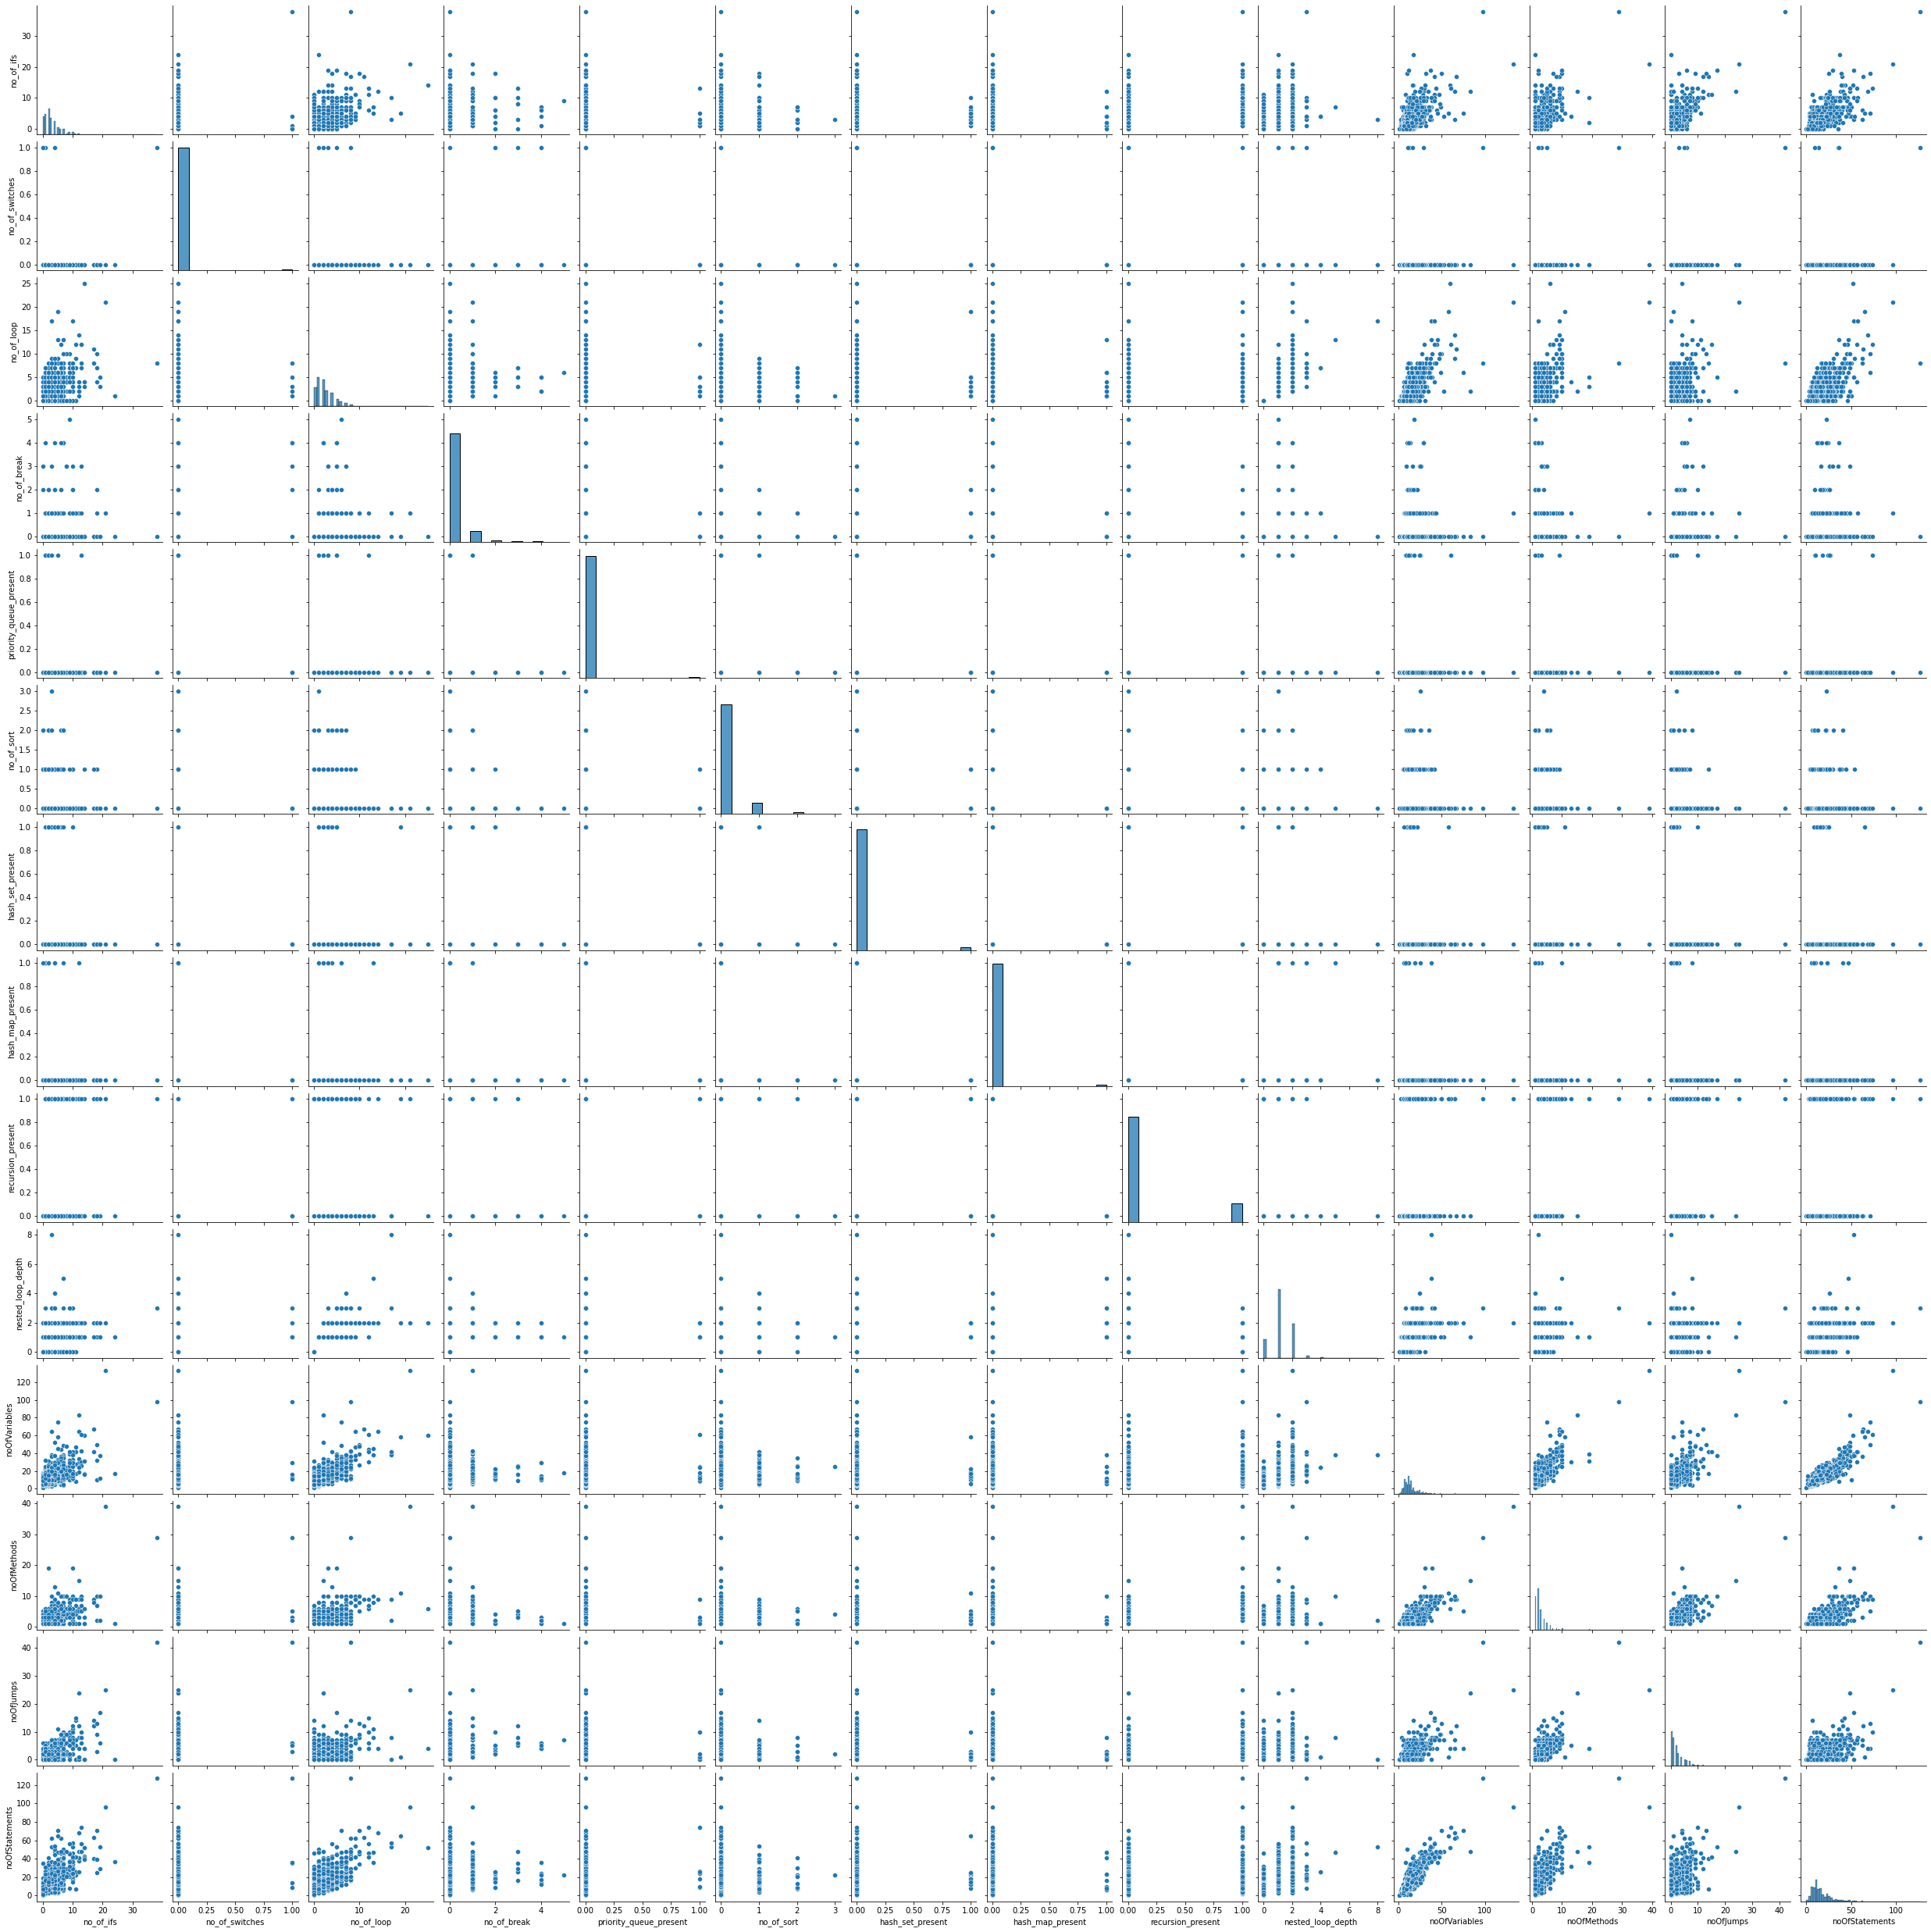

In [ ]:
sns.pairplot(data)

But we can used pandas correlation feature to compute the correlation between the features

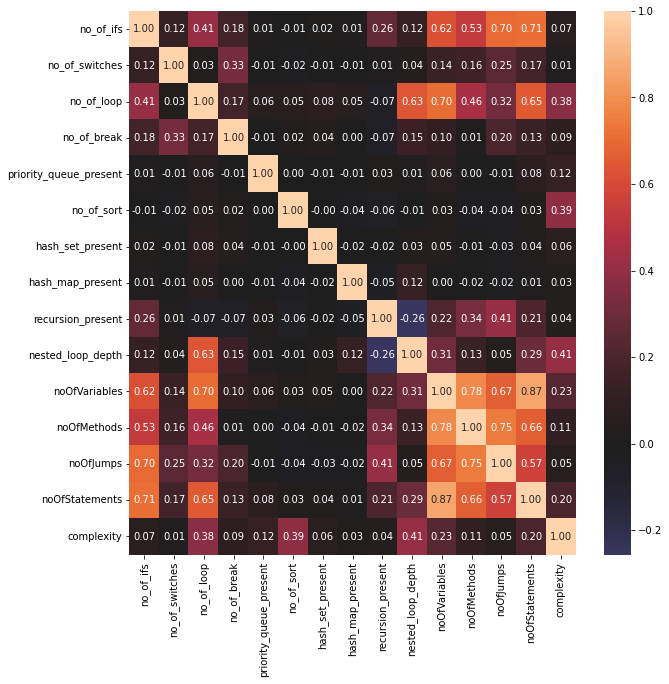

In [ ]:

train = df

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, center=0, fmt='.2f', annot=True)
    plt.show();
    
correlation_heatmap(train)

as we can see that there is no feature which is 0 or negative so there we cannot also remove the features

# Model Selection

1. Splitting dataset into independent and dependent feature X,Y respectively to feed into model

In [ ]:
X=df.drop(['complexity'],axis=1)
Y=df['complexity']

2. standardizing the X so to increase the accuracy and meking features scaler

In [ ]:
ss=StandardScaler()
X_s=ss.fit_transform(X)

3. Train test split

In [ ]:
xtr,xte, ytr,yte = train_test_split(X_s,Y, test_size=0.2,random_state=True)

4. Using algorithms to predict create multilabel classifier

In [ ]:
clf1_r = RandomForestClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(probability=True)

clf1_r = clf1_r.fit(xtr, ytr)
clf2 = clf2.fit(xtr, ytr)
clf3 = clf3.fit(xtr, ytr)

In [ ]:
print(cross_val_score(RandomForestClassifier(),xtr, ytr, cv=5))
print(cross_val_score(KNeighborsClassifier(),xtr, ytr, cv=5))
print(cross_val_score(SVC(),xtr, ytr, cv=5))

[0.72       0.71812081 0.72483221 0.70469799 0.7114094 ]
[0.61333333 0.63758389 0.66442953 0.69127517 0.6442953 ]
[0.66666667 0.63087248 0.69798658 0.67114094 0.65771812]


5. form the above reesults we can see that Ensemble model is giving best score so using ensemble model would probebly give  us best model to predict

Using different ensemble models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

As manny models as tunned or give good prediction bassed on the different no of estimators so by using for loop and cross val score to get best model

In [ ]:
for i in range(50,500,100):
  res=cross_val_score(RandomForestClassifier(n_estimators=i),xtr, ytr, cv=5)
  print(res.max(),i)

0.732824427480916 50
0.7480916030534351 150
0.7404580152671756 250
0.7480916030534351 350
0.7557251908396947 450


In [ ]:
for i in range(50,500,100):
  res=cross_val_score(ExtraTreesClassifier(n_estimators=i,bootstrap=True,oob_score=True),xtr, ytr, cv=5)
  print(res.max(),i)

0.732824427480916 50
0.7480916030534351 150
0.732824427480916 250
0.7480916030534351 350
0.7251908396946565 450


In [ ]:
for i in range(50,500,100):
  
  res=cross_val_score(AdaBoostClassifier(clf1_r,n_estimators=i),xtr, ytr, cv=5)
  print(res.max(),i)

0.732824427480916 50
0.7251908396946565 150
0.7230769230769231 250
0.7153846153846154 350
0.7384615384615385 450


In [ ]:
for i in range(50,500,100):
  
  res=cross_val_score(AdaBoostClassifier(clf_etc,n_estimators=i),xtr, ytr, cv=5)
  print(res.max(),i)

0.7404580152671756 50
0.7251908396946565 150
0.7557251908396947 250
0.7709923664122137 350
0.7633587786259542 450


In [ ]:
for i in range(50,500,100):
  
  res=cross_val_score(BaggingClassifier(n_estimators=i),xtr, ytr, cv=5)
  print(res.max(),i)

0.732824427480916 50
0.7404580152671756 150
0.7099236641221374 250
0.7251908396946565 350
0.7404580152671756 450


In [ ]:
for i in range(50,500,100):
  
  res=cross_val_score( xgb.XGBClassifier(n_estimators=i),xtr, ytr, cv=5)
  print(res.max(),i)

0.7251908396946565 50
0.7099236641221374 150
0.6946564885496184 250
0.6946564885496184 350
0.6946564885496184 450


In [ ]:
for i in range(50,500,100):
  
  res=cross_val_score(LGBMClassifier(n_estimators=i),xtr, ytr, cv=5)
  print(res.max(),i)

0.732824427480916 50
0.7022900763358778 150
0.6870229007633588 250
0.7099236641221374 350
0.7099236641221374 450


In [ ]:
for i in range(50,500,100):
  
  res=cross_val_score(GradientBoostingClassifier(n_estimators=i),xtr, ytr, cv=5)
  print(res.max(),i)

0.7404580152671756 50
0.7175572519083969 150
0.7251908396946565 250
0.7175572519083969 350
0.7175572519083969 450


from The above results we can say that Random forest and Extra tree are both giving best cross val score so we wil be selecting them to create model but lets see what are the best possible parameters for the model 

### hyper parameter tunning

By using gridsearchcv we are searching for the best possible prameters for the model

In [ ]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(n_estimators=110),
        'params' : {
            'criterion' : ["gini", "entropy"],
            'max_features' : ["auto", "sqrt", "log2"],
            'class_weight' : ["balanced", "balanced_subsample"]
        }
    },
    'extra_tree_forest': {
        'model':ExtraTreesClassifier(n_estimators=50),
        'params' : {
            'criterion' : ["gini", "entropy"],
            'max_features' : ["auto", "sqrt", "log2"],
            'class_weight' : ["balanced", "balanced_subsample"]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(xtr, ytr)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_gs = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_gs

,model,best_score,best_params
0,random_forest,0.712120,"{'class_weight': 'balanced_subsample', 'criter..."
1,extra_tree_forest,0.692214,"{'class_weight': 'balanced_subsample', 'criter..."


In [ ]:
clf_rfc=RandomForestClassifier(n_estimators=110,class_weight='balanced',criterion='entropy')
clf_rfc.fit(xtr,ytr)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=110)

In [ ]:
clf_etc=ExtraTreesClassifier(n_estimators=50,criterion='entropy',bootstrap=True,oob_score=True)
clf_etc.fit(xtr,ytr)

ExtraTreesClassifier(bootstrap=True, criterion='entropy', n_estimators=50,
                     oob_score=True)

In [ ]:
clf_ada=AdaBoostClassifier(clf_etc,n_estimators=350)
clf_ada=clf_ada.fit(xtr,ytr)

In [ ]:
clf_xgb=xgb.XGBClassifier(n_estimators=50)
clf_lgb=LGBMClassifier(n_estimators=50)
clg_gb=GradientBoostingClassifier(n_estimators=50)

In [ ]:
clf_xgb=clf_xgb.fit(xtr,ytr)
clf_lgb=clf_lgb.fit(xtr,ytr)
clg_gb=clg_gb.fit(xtr,ytr)

stacking
voting hard
voting soft
bagging
sgboost
light gbm
ada etc,rf
rf
etc


In [ ]:
ypre_xgb=clf_xgb.predict(xte)
ypre_lgb=clf_lgb.predict(xte)
ypre_gb=clg_gb.predict(xte)

Now lets try combining the RandomForestClassifier and ExtraForestClassifier by using varous methods like stacking and voting

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
models = [('etc',ExtraTreesClassifier(n_estimators=50,criterion='entropy',bootstrap=True,oob_score=True )),
          ('rf',RandomForestClassifier(n_estimators=110,class_weight='balanced',criterion='entropy')),
          ('ada',clf_ada)]
stacking = StackingClassifier(estimators=models)

In [ ]:
eclf_r_soft = VotingClassifier(estimators=[('etc',ExtraTreesClassifier(n_estimators=50,criterion='entropy',bootstrap=True,oob_score=True )),
          ('rf',RandomForestClassifier(n_estimators=110,class_weight='balanced',criterion='entropy')),
          ('ada',clf_ada)],voting='soft')

In [ ]:
eclf_r_hard = VotingClassifier(estimators=[('etc',ExtraTreesClassifier(n_estimators=50,criterion='entropy',bootstrap=True,oob_score=True )),
          ('rf',RandomForestClassifier(n_estimators=110,class_weight='balanced',criterion='entropy')),
          ('ada',clf_ada)],voting='soft')

In [ ]:
stacking.fit(xtr,ytr)
eclf_r_soft.fit(xtr,ytr)
eclf_r_hard.fit(xtr,ytr)

VotingClassifier(estimators=[('etc',
                              ExtraTreesClassifier(bootstrap=True,
                                                   criterion='entropy',
                                                   n_estimators=50,
                                                   oob_score=True)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     n_estimators=110)),
                             ('ada',
                              AdaBoostClassifier(estimator=ExtraTreesClassifier(bootstrap=True,
                                                                                criterion='entropy',
                                                                                n_estimators=50,
                                                                                oob_score=True),
                                                 n_estimators=350))],
                 voting='soft')

lets check for some advanced ensembling models

Here we are predicting all values or the test split for confussion matrix creation and then check for their accuracy.

In [ ]:
ypre_r=clf_rfc.predict(xte)
ypre_etc=clf_etc.predict(xte)
ypre_st=stacking.predict(xte)
ypre_cs=eclf_r_soft.predict(xte)
ypre_ch=eclf_r_hard.predict(xte)
ypre_ada=clf_ada.predict(xte)

In [ ]:
from sklearn.metrics import accuracy_score
accu=[]
pre_y=[ypre_r,ypre_etc,ypre_ada,ypre_ch,ypre_cs,ypre_gb,ypre_lgb,ypre_st,ypre_xgb]
for i in pre_y:
  accu.append(accuracy_score(yte,i))

accu

[0.7219251336898396,
 0.7272727272727273,
 0.7219251336898396,
 0.7272727272727273,
 0.7219251336898396,
 0.7165775401069518,
 0.732620320855615,
 0.7272727272727273,
 0.7058823529411765]

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

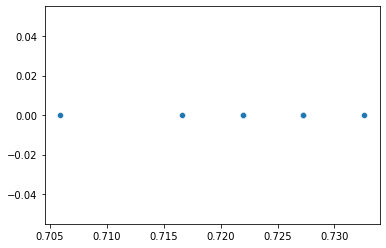

In [ ]:
sns.scatterplot(accu,np.zeros(9))

In [ ]:
from sklearn.metrics import confusion_matrix
c_r=confusion_matrix(yte,ypre_r)
c_etc=confusion_matrix(yte,ypre_etc)
c_st=confusion_matrix(yte,ypre_st)
c_vs=confusion_matrix(yte,ypre_cs)
c_vh=confusion_matrix(yte,ypre_ch)
c_ada=confusion_matrix(yte,ypre_ada)

<AxesSubplot:>

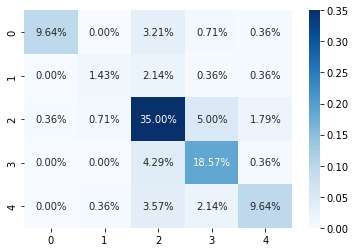

In [ ]:
sns.heatmap(c_r/np.sum(c_r), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

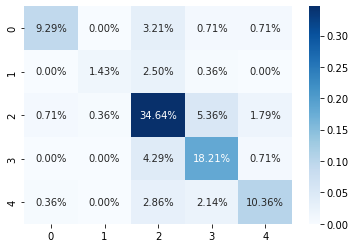

In [ ]:
sns.heatmap(c_etc/np.sum(c_etc), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

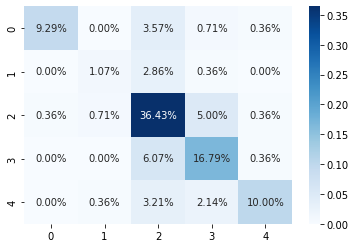

In [ ]:
sns.heatmap(c_st/np.sum(c_st), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

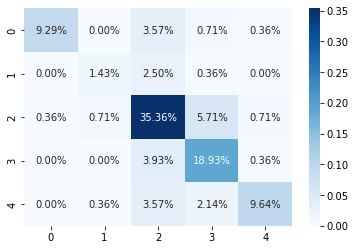

In [ ]:
sns.heatmap(c_vs/np.sum(c_vs), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

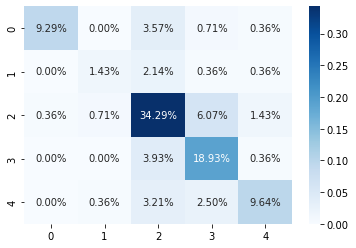

In [ ]:
sns.heatmap(c_vh/np.sum(c_vh), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

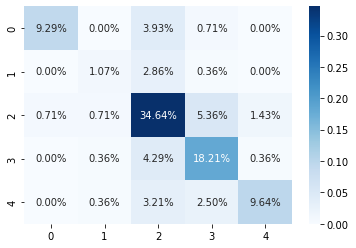

In [ ]:
sns.heatmap(c_ada/np.sum(c_ada), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import f1_score
y_true=yte
pred_col=[ypre_r,ypre_etc,ypre_ada,ypre_ch,ypre_cs,ypre_gb,ypre_lgb,ypre_st,ypre_xgb]
result_f1=[]
for i in pred_col:
  result_f1.append(f1_score(y_true,i,average=None))


From the above array we can state that the best model for prediction is voting_soft classifier which is providing 78 present f1 score

In [ ]:
from sklearn.metrics import accuracy_score
accu=[]
pre_y=[ypre_r,ypre_etc,ypre_ada,ypre_ch,ypre_cs,ypre_gb,ypre_lgb,ypre_st,ypre_xgb]
for i in pre_y:
  accu.append(accuracy_score(yte,i))

accu

[0.6898395721925134,
 0.7005347593582888,
 0.7058823529411765,
 0.6951871657754011,
 0.7005347593582888,
 0.6737967914438503,
 0.6737967914438503,
 0.6898395721925134,
 0.6684491978609626]

In [ ]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

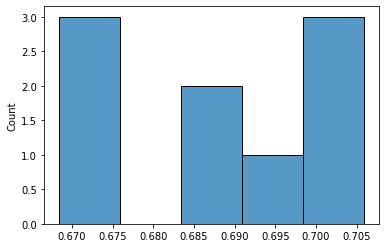

In [ ]:
sns.histplot(accu)